# Importing pandas, numpy, pyplot

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset

In [217]:
df = pd.read_csv('TheSocialDilemma.csv')

In [218]:
df.shape

(20068, 14)

In [219]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [220]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'Sentiment'],
      dtype='object')

## Cleaning text from unnecessary things

### Importing nltk for cleaning from stopwords

In [221]:
from nltk.corpus import stopwords

### View of our text

In [222]:
df["text"]

0        @musicmadmarc @SocialDilemma_ @netflix @Facebo...
1        @musicmadmarc @SocialDilemma_ @netflix @Facebo...
2        Go watch “The Social Dilemma” on Netflix!\n\nI...
3        I watched #TheSocialDilemma last night. I’m sc...
4        The problem of me being on my phone most the t...
                               ...                        
20063    #TheSocialDilemma yalll.... this shit... we kn...
20064    Peeps:\n\nFind 90 minutes this weekend and wat...
20065    So you watched #thesocialdilemma, or have been...
20066    Good social media advice:\n\nChoose the thing ...
20067    Boulder director Jeff Orlowski hopes viewers o...
Name: text, Length: 20068, dtype: object

### Importing supporting modules for easier work with text

In [223]:
import re
import string

In [224]:
stop_words = stopwords.words("english")

### Removing mentions, url, hashtags, all numbers, punctuations, extra spaces and converting to lowercase

In [225]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text
df["clean_text"]=df["text"].apply(lambda x:clean_text(x))

In [226]:
df["clean_text"]

0         also reminded poignant quote french philosoph...
1           haa hey marc get saying amp agree 🤪 whicheve… 
2        go watch “the social dilemma” netflix it’s bes...
3        watched last night i’m scared humanity i’m sur...
4                    problem phone time trying watch 🤦🏼‍♀️
                               ...                        
20063     yalll shit know it’s true scary shit friends ...
20064    peeps find minutes weekend watch social dilemm...
20065    watched stressed social media lately don’t wan...
20066    good social media advice choose thing click cl...
20067    boulder director jeff orlowski hopes viewers “...
Name: clean_text, Length: 20068, dtype: object

## Importing nltk for tokenezation

### Tokenezating text

In [227]:
from nltk.tokenize import word_tokenize

In [228]:
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
df['text_tokenied'] = df['clean_text'].apply(lambda x: tokenization(x))

In [229]:
df['text_tokenied']

0        [also, reminded, poignant, quote, french, phil...
1        [haa, hey, marc, get, saying, amp, agree, 🤪, w...
2        [go, watch, “, the, social, dilemma, ”, netfli...
3        [watched, last, night, i, ’, m, scared, humani...
4             [problem, phone, time, trying, watch, 🤦🏼‍♀️]
                               ...                        
20063    [yalll, shit, know, it, ’, s, true, scary, shi...
20064    [peeps, find, minutes, weekend, watch, social,...
20065    [watched, stressed, social, media, lately, don...
20066    [good, social, media, advice, choose, thing, c...
20067    [boulder, director, jeff, orlowski, hopes, vie...
Name: text_tokenied, Length: 20068, dtype: object

## Importing lemmatizer and stemmer

In [230]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

### Lemmatizer

In [231]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['text_lemmatized']=df['text_tokenied'].apply(lambda x:lemmatizer(x))

In [232]:
df['text_lemmatized']

0        [also, reminded, poignant, quote, french, phil...
1        [haa, hey, marc, get, saying, amp, agree, 🤪, w...
2        [go, watch, “, the, social, dilemma, ”, netfli...
3        [watched, last, night, i, ’, m, scared, humani...
4             [problem, phone, time, trying, watch, 🤦🏼‍♀️]
                               ...                        
20063    [yalll, shit, know, it, ’, s, true, scary, shi...
20064    [peep, find, minute, weekend, watch, social, d...
20065    [watched, stressed, social, medium, lately, do...
20066    [good, social, medium, advice, choose, thing, ...
20067    [boulder, director, jeff, orlowski, hope, view...
Name: text_lemmatized, Length: 20068, dtype: object

### Stemmer

In [233]:
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['text_stemmed']=df['text_tokenied'].apply(lambda x: stemming(x))

In [234]:
df['text_stemmed']

0        [also, remind, poignant, quot, french, philoso...
1        [haa, hey, marc, get, say, amp, agre, 🤪, which...
2        [go, watch, “, the, social, dilemma, ”, netfli...
3        [watch, last, night, i, ’, m, scare, human, i,...
4                [problem, phone, time, tri, watch, 🤦🏼‍♀️]
                               ...                        
20063    [yalll, shit, know, it, ’, s, true, scari, shi...
20064    [peep, find, minut, weekend, watch, social, di...
20065    [watch, stress, social, media, late, don, ’, t...
20066    [good, social, media, advic, choos, thing, cli...
20067    [boulder, director, jeff, orlowski, hope, view...
Name: text_stemmed, Length: 20068, dtype: object

## Importing wordcloud


In [235]:
from wordcloud import WordCloud

In [236]:
def visualize(text):
    wordcloud = WordCloud(width=600, height=400, background_color="black").generate(text)
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Making lemmatized wordcloud

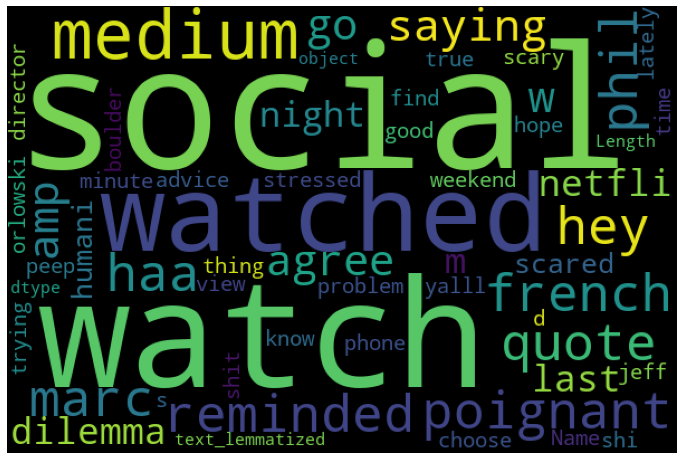

In [237]:
visualize(str(df['text_lemmatized']))

### Making stemmed wordcloud

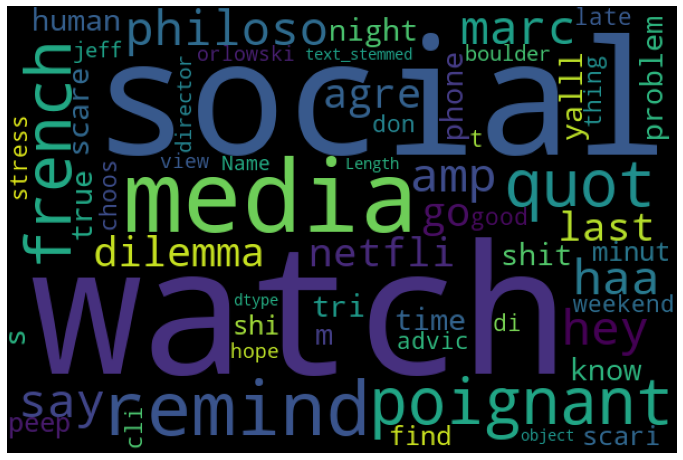

In [238]:
visualize(str(df['text_stemmed']))